In [2]:
from data import WhitenedDataset
import torch
from torch.utils.data import DataLoader
from utils import accumulate_frames
import matplotlib.pyplot as plt
import numpy as np

dataset = WhitenedDataset(
  sampling_frequency=1000.,
  pixels_per_degree=180.,
  roi_size=32,
  fixation_samples=256,
  diffusion_constant=40.0 / 3600.0,
)

dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

input, target, target_idx, gaze_pos = next(iter(dataloader))


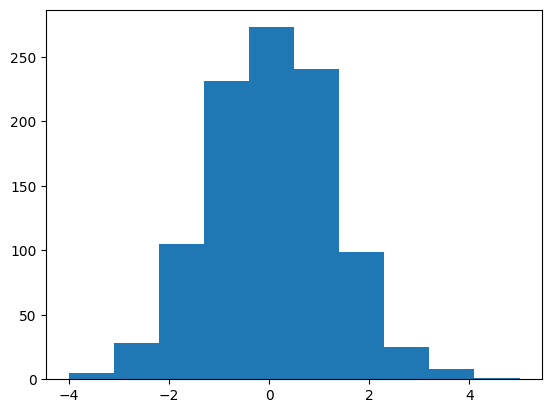

In [5]:
plt.figure()
for i in range(1):
  input, target, target_idx, gaze_pos = next(iter(dataloader))
  plt.hist(gaze_pos.diff(2).flatten())
  # plt.hist(gaze_pos[:,1].view(-1, gaze_pos.shape[2]).diff(1))


In [91]:
recons = torch.stack(
  [
    accumulate_frames(frames, pos - pos[:, idx][:, None])
    for frames, pos, idx in zip(
        input,
        gaze_pos[:, :, :],
        target_idx,
    )
  ]
)

In [2]:
batch = np.random.randint(input.shape[0])

plt.figure()
plt.plot(gaze_pos[batch,0])
plt.plot(gaze_pos[batch,1])

show_n = 5
fig, axs = plt.subplots(1, show_n)
for i, frame in enumerate(input[batch,target_idx[batch]:target_idx[batch]+show_n]):
  axs[i].imshow(frame)
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(recons[batch])
axs[1].imshow(target[batch])

NameError: name 'np' is not defined

In [70]:
target.shape

torch.Size([8, 32, 32])